In [27]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from math import e
import pickle
from sklearn import svm
import numpy as np
import timeit
import random
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [3]:
neg = open("./neg.txt", "r")
lines = [line.rstrip('\n') for line in neg]
neg_words = [[word for word in word_tokenize(line)] for line in lines]

pos = open("./pos.txt", "r")
lines = [line.rstrip('\n') for line in pos]
pos_words = [[word for word in word_tokenize(line)] for line in lines] 
#pos_words[n] == ["this", "for", "example"]

temp = neg_words
neg_words = []
for line in temp:
    for word in line:
        neg_words.append(word)

temp = pos_words
pos_words = []
for line in temp:
    for word in line:
        pos_words.append(word)
        
all_words = pos_words+neg_words
most_common_words = nltk.FreqDist(all_words)

most_common_words = [word for word in most_common_words if 900>most_common_words[word] > 2]

In [4]:
def create_feature(rev):
    feature = []
    for word in most_common_words:
        feature.append(word in word_tokenize(rev))
    return feature

#un feature consiste en una liste de True y False, para cada una de las palabras mas comunes
#segun esten en la rev

In [24]:
"""
neg = open(r"./neg.txt", "r")
pos = open(r"./pos.txt", "r")

pos_lines = [line.rstrip('\n') for line in pos]
neg_lines = [line.rstrip('\n') for line in neg]

featureset = []
count = 0
for rev in pos_lines[:1000]:
    featureset.append((create_feature(rev), "pos"))
    count += 1
    if count%20==0:
        print(count, " out of 1000")
count = 0
for rev in neg_lines[:1000]:
    featureset.append((create_feature(rev), "neg"))
    count += 1
    if count%20==0:
        print(count, " out of 1000")


pickle_in = open("featureset.pickle","rb")
featureset = pickle.load(pickle_in)

#PARA ENTRENAR AL CLASIFICADOR DE NUEVO CON OTRA DATA

GUARDAMOS LOS FEATURES
pickle_out = open("featureset.pickle","wb")
pickle.dump(featureset, pickle_out)
pickle_out.close()


random.shuffle(featureset)

test_set = featureset[1900:]
train_set = featureset[:1900]

X = [x[0] for x in train_set]
y = [x[1] for x in train_set]

X = np.array(X)
y = np.array(y)

LinearSVCclf = svm.LinearSVC()
GaussianNBclf = GaussianNB()

GaussianNBclf.fit(X, y)
LinearSVCclf.fit(X, y)

#GUARDAMOS EL CLF YA ENTRENADO
pickle_out = open("LinSVCclf.pickle", "wb")
pickle.dump(LinearSVCclf, pickle_out)
pickle_out.close()

pickle_out = open("GaussianNBclf.pickle", "wb")
pickle.dump(GaussianNBclf, pickle_out)
pickle_out.close()

"""
#tomamos los clf guardado
pickle_in = open("LinSVCclf.pickle","rb")
LinearSVCclf = pickle.load(pickle_in)

pickle_in = open("GaussianNBclf.pickle","rb")
GaussianNBclf = pickle.load(pickle_in)


def sentiment(sentence):
    X = np.array(create_feature(sentence))
    X = X.reshape(1, -1)
    return LinearSVCclf.predict(X)[0], GaussianNBclf.predict(X)[0]

In [25]:
IMDB = pd.read_csv(r".\IMDB Dataset.csv") #El archivo IMDB.csv esta en https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews    

In [39]:
true = []
gnb = []
lsvc = []

#guardamos el resultado verdadero de la review, la prediccion que da gnb, y la del svc

for i in range(50):
    index = random.choice(IMDB.index)
    true.append(IMDB["sentiment"][index])
    svc, gaussiannb = sentiment(IMDB["review"][index])
    gnb.append(gaussiannb)
    lsvc.append(svc)
    print(len(gnb), len())

<BarContainer object of 3 artists>

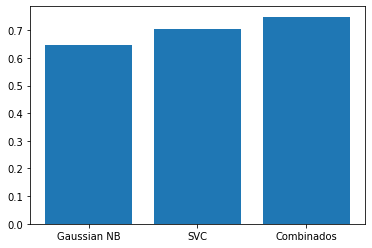

In [58]:
#calculamos la performance de cada uno, y de los dos combinados
temp = true
true = []
for i in temp:
    if i == "negative":
        true.append("neg")
    elif i == "positive":
        true.append("pos")
    
gnb_score = 0
svc_score = 0
equal_results = 0
both_score = 0

for i in range(len(true)):
    if true[i] == gnb[i]:
        gnb_score += 1
    
    if true[i] == lsvc[i]:
        svc_score += 1
    
    if true[i] == gnb[i] == lsvc[i]:
        both_score += 1
    
    if lsvc[i] == gnb[i]:
        equal_results += 1
        


labels = ["Gaussian NB", "SVC", "Combinados"]
resultados = [gnb_score/300, svc_score/300, both_score/equal_results]
plt.bar(labels, resultados)
    
    